<a href="https://colab.research.google.com/github/mahfuz978/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Assignment_3_Making_Data_backed_Assertions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd
raw_data = "https://raw.githubusercontent.com/mahfuz978/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"
df = pd.read_csv(raw_data)
print(df.shape)
df.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
! pip install pandas==0.23.4

In [0]:
age_bins = pd.cut(df['age'], 6)
weight_bins = pd.cut(df['weight'], 6)
exercise_time_bins = pd.cut(df['exercise_time'], 6)
pd.crosstab(age_bins, exercise_time_bins)

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
age,,,,,,
"(17.938, 28.333]",29,35,33,45,39,28
"(28.333, 38.667]",48,32,29,42,34,32
"(38.667, 49.0]",27,40,25,26,36,46
"(49.0, 59.333]",26,30,29,29,24,46
"(59.333, 69.667]",44,53,33,36,22,4
"(69.667, 80.0]",67,74,45,12,0,0


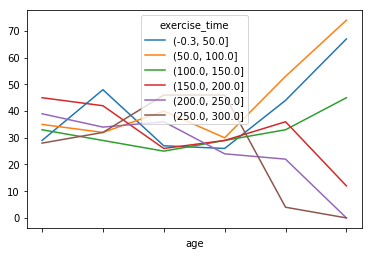

In [0]:
age_vs_excercise_time = pd.crosstab(age_bins, exercise_time_bins)
age_vs_excercise_time.plot();

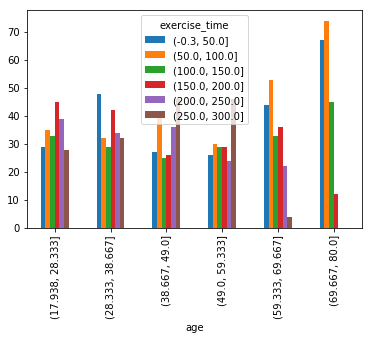

In [0]:
age_vs_excercise_time.plot(kind = 'bar');

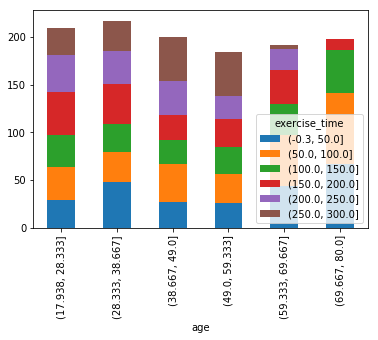

In [0]:
age_vs_excercise_time.plot(kind = 'bar', stacked = True);

In [0]:
pd.crosstab(weight_bins, exercise_time_bins)

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
weight,,,,,,
"(99.854, 124.333]",34,42,51,51,46,70
"(124.333, 148.667]",37,47,27,62,63,68
"(148.667, 173.0]",37,63,49,44,42,18
"(173.0, 197.333]",47,45,41,31,4,0
"(197.333, 221.667]",52,62,26,2,0,0
"(221.667, 246.0]",34,5,0,0,0,0


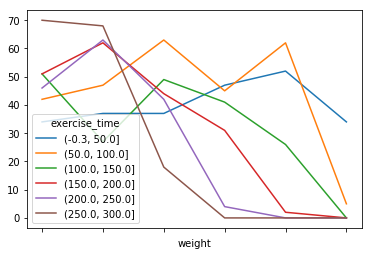

In [0]:
weight_vs_excercise_time = pd.crosstab(weight_bins, exercise_time_bins)
weight_vs_excercise_time.plot();

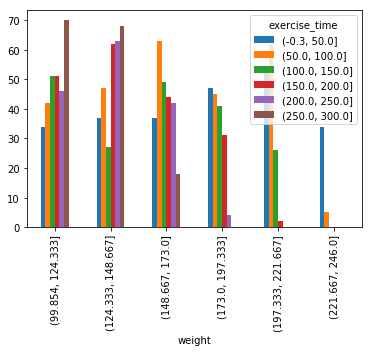

In [0]:
weight_vs_excercise_time.plot(kind = 'bar');

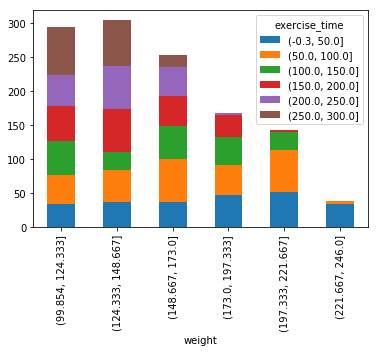

In [0]:
weight_vs_excercise_time.plot(kind='bar', stacked = True);

In [0]:
pd.crosstab(age_bins, weight_bins)

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
age,,,,,,
"(17.938, 28.333]",56,57,48,23,20,5
"(28.333, 38.667]",70,49,44,28,22,4
"(38.667, 49.0]",49,64,39,22,21,5
"(49.0, 59.333]",50,50,33,28,22,1
"(59.333, 69.667]",30,48,44,32,29,9
"(69.667, 80.0]",39,36,45,35,28,15


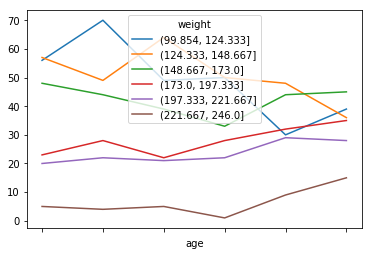

In [0]:
age_vs_weight = pd.crosstab(age_bins, weight_bins)
age_vs_weight.plot();

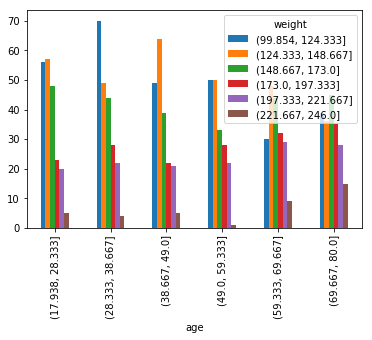

In [0]:
age_vs_weight.plot(kind= 'bar');

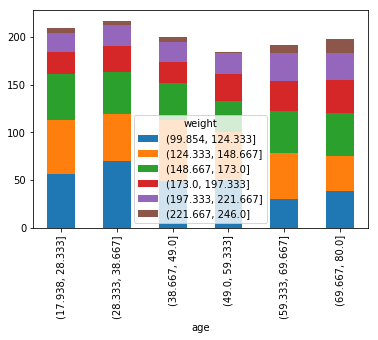

In [0]:
age_vs_weight.plot(kind = 'bar', stacked = True);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

The three variable here are: '**age**'( discrete) , '**weight** (continious)'  and '**excercise_time**.'(continious)

2.  What are the relationships between the variables?

From what I have seen from the graphs is that the top closely related is weight vs excercise_time.
Age vs excercise_time was also related somewhat.
and on the other hand age and weight had no relationship.

3.  Which relationships are "real", and which spurious?

weight vs excercise_time is "real"

age and weight is spurious

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)